In [1]:
from pathlib import Path
from mask import  compute_binary_mask, compute_soft_mask
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display
from modules import *
import pickle

In [2]:
class Param_stft():
    def __init__(self) -> None:
        self.n_fft = 2048
        self.n_window = 600
        self.hop_length = 256
        self.window = "hann"

In [3]:
param_stft = Param_stft()
snr = 10
name = 980

In [4]:
audio_raw_data_path = Path.cwd() / "data" / "raw_data_cut" / f"{name}.flac" 
signal_and_noise_path = Path.cwd() / "data" / "noised_data" / f"{snr}" / f"{name}.flac"

In [5]:
y_raw, sr = librosa.load(audio_raw_data_path, sr=None)
y_noised, sr = librosa.load(signal_and_noise_path, sr=None)

In [22]:
stft_y_noised = librosa.stft(y_noised, n_fft=param_stft.n_fft, hop_length=param_stft.hop_length, win_length=param_stft.n_window, window=param_stft.window)

mod_noised = np.abs(stft_y_noised)**2

mod_noised_normalized = mod_noised / mod_noised.max()

mask = np.zeros_like(mod_noised_normalized)

for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        mask[i][j] = 1 if mod_noised[i][j] >= 0.7 else 0.1

stft_y_noised_with_mask = stft_y_noised * mask

reconstructed_signal = librosa.istft(stft_y_noised_with_mask, n_fft=param_stft.n_fft, hop_length=param_stft.hop_length, win_length=param_stft.n_window, window=param_stft.window)


251


In [23]:
display(Audio(y_raw, rate=sr))
display(Audio(y_noised, rate=sr))
display(Audio(reconstructed_signal, rate=sr))

/tmp/ipykernel_6148/3115756249.py:5: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(stft_y_raw, ref=np.max), sr=sr, hop_length=param_stft.hop_length, x_axis='time', y_axis='log')


<Figure size 640x480 with 0 Axes>

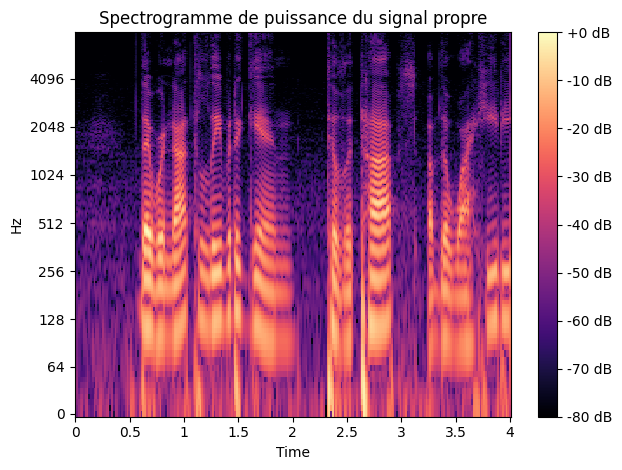

<Figure size 640x480 with 0 Axes>

In [16]:
stft_y_raw = librosa.stft(y_raw, n_fft=param_stft.n_fft, hop_length=param_stft.hop_length, win_length=param_stft.n_window, window=param_stft.window)

# Affichage du spectrogramme du signal propre
plt.figure()
librosa.display.specshow(librosa.amplitude_to_db(stft_y_raw, ref=np.max), sr=sr, hop_length=param_stft.hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogramme de puissance du signal propre')
plt.tight_layout()
plt.figure()

/tmp/ipykernel_6148/990915073.py:3: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(stft_y_noised, ref=np.max), sr=sr, hop_length=param_stft.hop_length, x_axis='time', y_axis='log')


<Figure size 640x480 with 0 Axes>

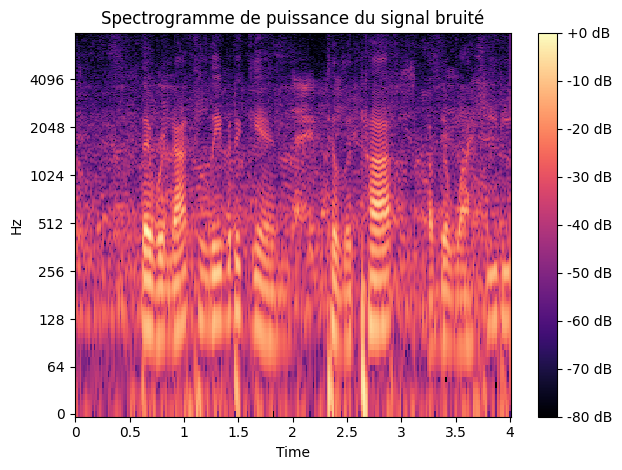

<Figure size 640x480 with 0 Axes>

In [17]:
#Affichage du spectrogramme du signal bruité
plt.figure()
librosa.display.specshow(librosa.amplitude_to_db(stft_y_noised, ref=np.max), sr=sr, hop_length=param_stft.hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogramme de puissance du signal bruité')
plt.tight_layout()
plt.figure()

/tmp/ipykernel_6148/102751170.py:3: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(stft_y_noised_with_mask, ref=np.max), sr=sr, hop_length=param_stft.hop_length, x_axis='time', y_axis='log')


<Figure size 640x480 with 0 Axes>

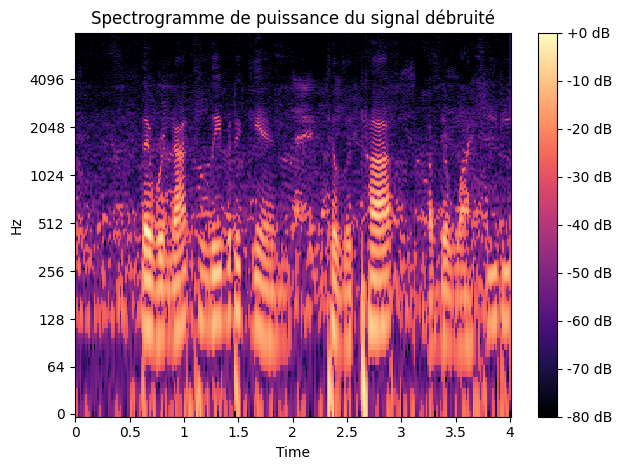

<Figure size 640x480 with 0 Axes>

In [18]:
# Affichage du spectrogramme du signal débruité
plt.figure()
librosa.display.specshow(librosa.amplitude_to_db(stft_y_noised_with_mask, ref=np.max), sr=sr, hop_length=param_stft.hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogramme de puissance du signal débruité')
plt.tight_layout()
plt.figure()